In [32]:
library(dplyr)
library(magrittr)
library(knitr)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


# 0. Load data

In [1]:
df <- read.csv("Case2_FullDataFrame.csv", header = TRUE)

# 1. Data description

In [3]:
head(df)

X,year,sex,name,home,age,runTime
1999.1,1999,FALSE,Jane Omoro,Kenya,26,53.61667
1999.2,1999,FALSE,Jane Ngotho,Kenya,29,53.63333
1999.3,1999,FALSE,Lidiya Grigoryeva,Russia,NA,53.66667
1999.4,1999,FALSE,Eunice Sagero,Kenya,20,53.91667
1999.5,1999,FALSE,Alla Zhilyayeva,Russia,29,54.13333
1999.6,1999,FALSE,Teresa Wanjiku,Kenya,24,54.16667


The dataframe  with 75971 observation with  the followinfg attribute:
year:  to be described
sex: to be described
name: to be described
name: to be described
home: to be described
age: to be described
runTime: to be described

In [7]:
# removing unecessary variable ("X" and  "sex")
df = df[,(names(df)!= "X" & names(df)!= "sex")]

In [8]:
head(df)

year,name,home,age,runTime
1999,Jane Omoro,Kenya,26,53.61667
1999,Jane Ngotho,Kenya,29,53.63333
1999,Lidiya Grigoryeva,Russia,NA,53.66667
1999,Eunice Sagero,Kenya,20,53.91667
1999,Alla Zhilyayeva,Russia,29,54.13333
1999,Teresa Wanjiku,Kenya,24,54.16667


# 2. DATA EXPLORATION

In [9]:
str(df)

'data.frame':	75971 obs. of  5 variables:
 $ year   : int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...
 $ name   : Factor w/ 57285 levels "  A. Renee Callahan            ",..: 22230 22228 34573 19121 4590 52025 16445 19910 43455 37179 ...
 $ home   : Factor w/ 6617 levels "                   ",..: 2510 2510 4187 2510 4187 2510 4816 2510 1170 2510 ...
 $ age    : int  26 29 NA 20 29 24 38 NA 27 30 ...
 $ runTime: num  53.6 53.6 53.7 53.9 54.1 ...


In [10]:
summary(df)

      year                            name                           home      
 Min.   :1999    Jennifer Johnson       :   14    Washington DC        : 8602  
 1st Qu.:2005    Alison Smith           :   11    Washington DC        : 5698  
 Median :2008    Linda Kennedy          :   11    Arlington VA         : 4324  
 Mean   :2007    Angela Lee             :   10    Arlington VA         : 3497  
 3rd Qu.:2010    Heather Stevens        :   10    Alexandria VA        : 2005  
 Max.   :2012    Esther Kim             :    9    Alexandria VA        : 1910  
                (Other)                 :75906   (Other)               :49935  
      age           runTime      
 Min.   : 0.00   Min.   : 51.73  
 1st Qu.:27.00   1st Qu.: 88.53  
 Median :32.00   Median : 97.33  
 Mean   :33.85   Mean   : 98.09  
 3rd Qu.:39.00   3rd Qu.:106.78  
 Max.   :87.00   Max.   :177.52  
 NA's   :34                      

In [40]:
#convert year to a factor variable instead of  numerical variable
df$year<- factor(df$year) 

In [41]:
str(df)

'data.frame':	75937 obs. of  5 variables:
 $ year   : Factor w/ 14 levels "1999","2000",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ name   : Factor w/ 57285 levels "  A. Renee Callahan            ",..: 22230 22228 19121 4590 52025 16445 43455 37179 50969 30492 ...
 $ home   : Factor w/ 6617 levels "                   ",..: 2510 2510 2510 4187 2510 4816 1170 2510 1610 563 ...
 $ age    : int  26 29 20 29 24 38 27 30 30 37 ...
 $ runTime: num  53.6 53.6 53.9 54.1 54.2 ...
 - attr(*, "na.action")= 'omit' Named int  3 8 17 2175 7764 8775 9678 10755 18420 18428 ...
  ..- attr(*, "names")= chr  "3" "8" "17" "2175" ...


In [ ]:
### TODO  print NA total

In [25]:
#remove na quick fix
df <- na.omit(df) 

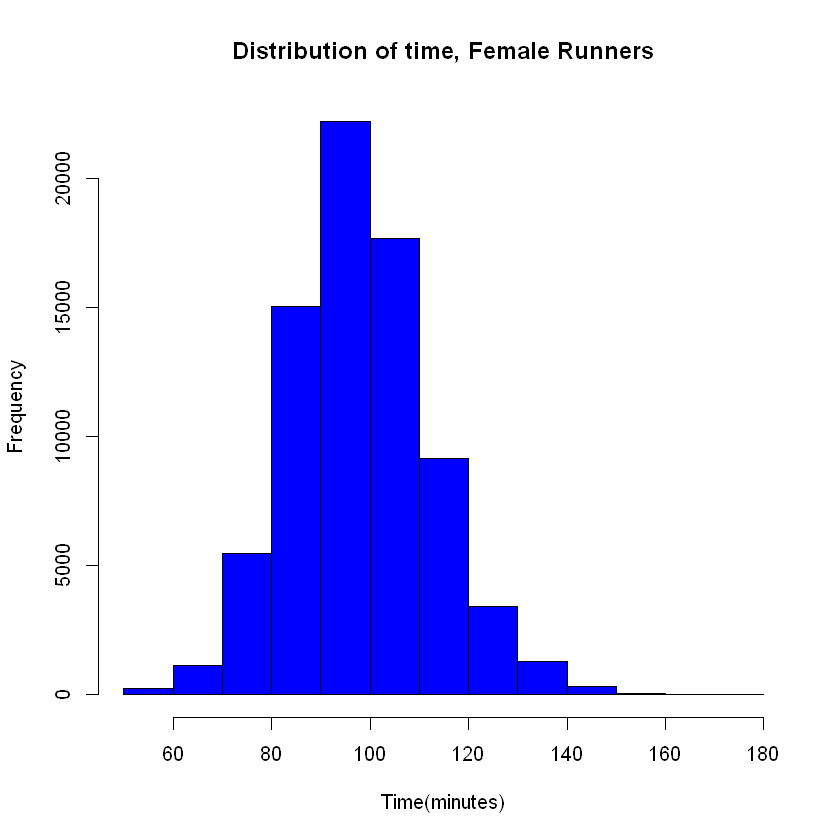

In [26]:
hist(df$runTime, xlab = "Time(minutes)", main = "Distribution of time, Female Runners", 
    col = "blue", breaks = 10)

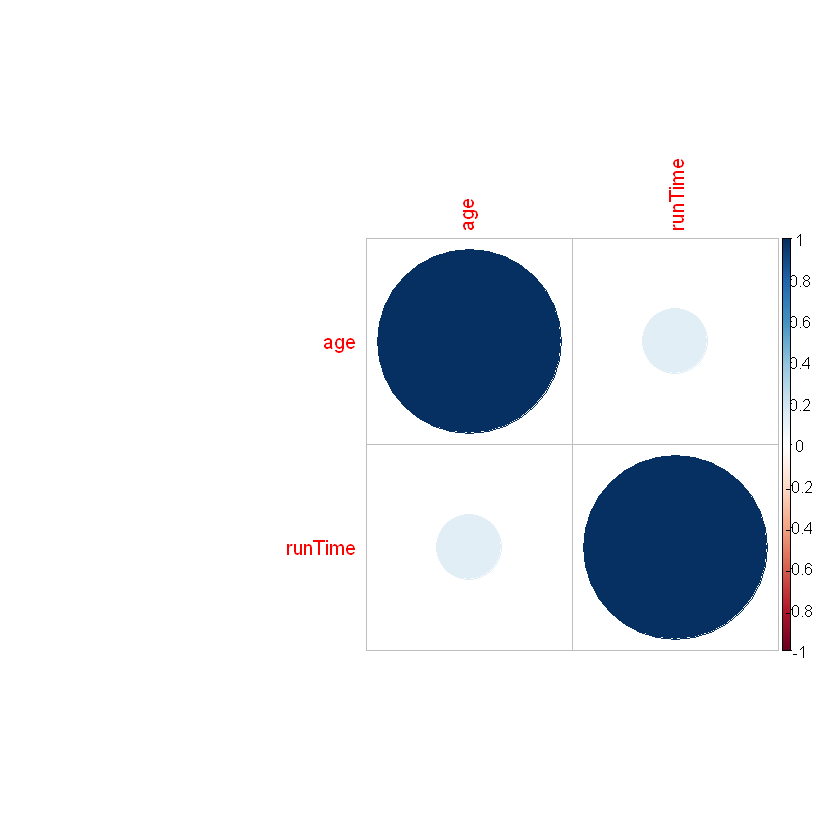

In [42]:
# #dot correlation
data_num <- select_if(df, is.numeric)   
correlations <- cor(select_if(df, is.numeric))
corrplot(correlations, method="circle")

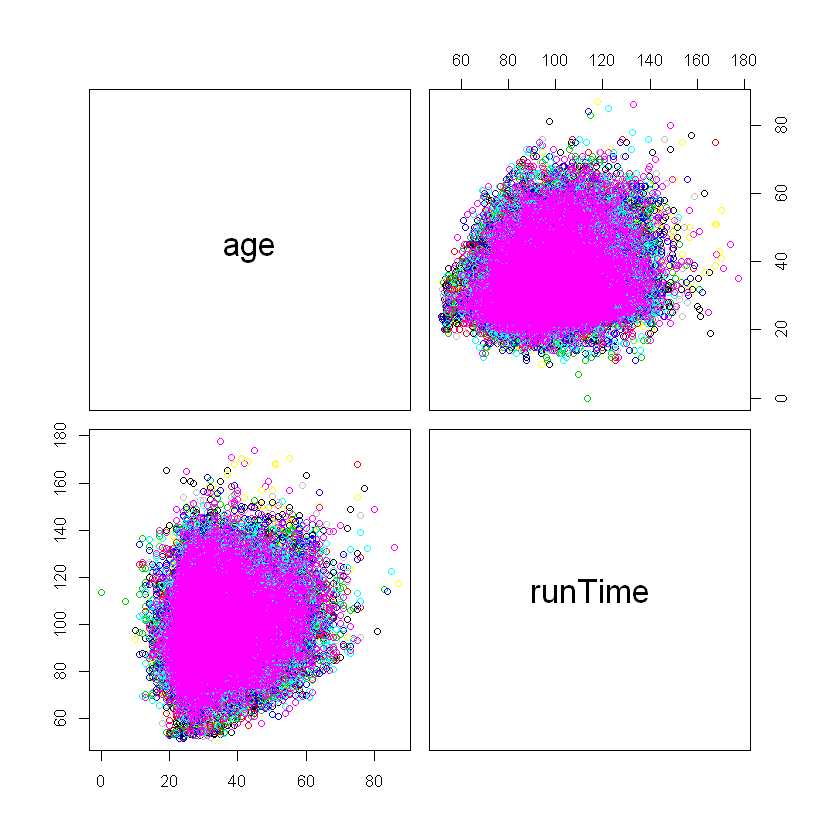

In [43]:
# #matrix based on Attrition
pairs(select_if(df, is.numeric), col=df$year)